<a href="https://colab.research.google.com/github/As2909/PRODIGY_ML_03/blob/main/Task_03_ML_Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# config the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:28<00:00, 38.8MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.2MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/dogs-vs-cats.zip", "r") as zip_ref:
  zip_ref.extractall("/content/")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Data Preprocessing

In [ ]:
# Preprocessing the training dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [ ]:
# Preprocessing the Test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory("/content/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = "binary")

Found 5000 images belonging to 2 classes.


Building the cnn

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

In [ ]:
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [ ]:
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Adding a second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# Step 4 - Full Connnection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Step 5 -Output Layer (linear SVM for binary classification)
cnn.add(Dense(1, kernel_regularizer = l2(0.01), activation= "linear"))

cnn.compile(optimizer = "adam", loss = "hinge", metrics = ["accuracy"])

Training the CNN

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set

r = cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
625/625 [==============================] - 89s 140ms/step - loss: 0.8095 - accuracy: 0.6213 - val_loss: 0.6530 - val_accuracy: 0.6862
Epoch 2/5
625/625 [==============================] - 89s 142ms/step - loss: 0.6404 - accuracy: 0.6993 - val_loss: 0.5702 - val_accuracy: 0.7484
Epoch 3/5
625/625 [==============================] - 86s 137ms/step - loss: 0.5714 - accuracy: 0.7308 - val_loss: 0.6509 - val_accuracy: 0.7610
Epoch 4/5
625/625 [==============================] - 88s 140ms/step - loss: 0.5407 - accuracy: 0.7478 - val_loss: 0.4888 - val_accuracy: 0.7960
Epoch 5/5
625/625 [==============================] - 89s 142ms/step - loss: 0.5086 - accuracy: 0.7653 - val_loss: 0.4924 - val_accuracy: 0.8000


In [ ]:
r = cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5
625/625 [==============================] - 89s 142ms/step - loss: 0.4906 - accuracy: 0.7736 - val_loss: 0.4560 - val_accuracy: 0.7930
Epoch 2/5
625/625 [==============================] - 94s 150ms/step - loss: 0.4798 - accuracy: 0.7755 - val_loss: 0.5207 - val_accuracy: 0.8084
Epoch 3/5
625/625 [==============================] - 97s 155ms/step - loss: 0.4750 - accuracy: 0.7835 - val_loss: 0.4652 - val_accuracy: 0.8142
Epoch 4/5
625/625 [==============================] - 90s 143ms/step - loss: 0.4557 - accuracy: 0.7904 - val_loss: 0.4433 - val_accuracy: 0.8076
Epoch 5/5
625/625 [==============================] - 96s 153ms/step - loss: 0.4539 - accuracy: 0.7925 - val_loss: 0.4373 - val_accuracy: 0.8094


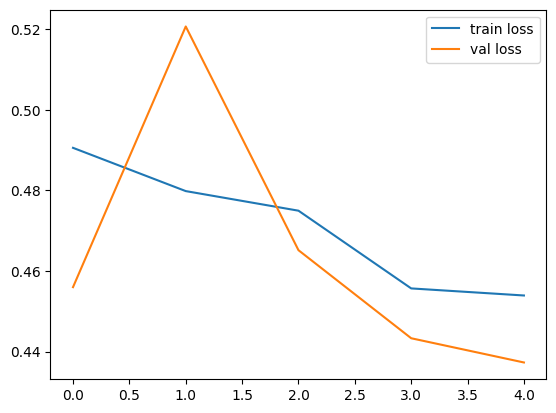

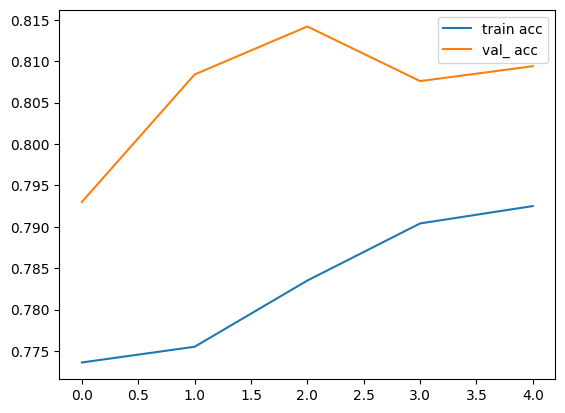

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the loss
from matplotlib import pyplot as plt

plt.plot(r.history["loss"], label = "train loss")
plt.plot(r.history["val_loss"], label ="val loss")
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

# Plot the accuracy
plt.plot(r.history["accuracy"], label = "train acc")
plt.plot(r.history["val_accuracy"], label ="val_ acc")
plt.legend()
plt.show()
plt.savefig("AccVal_acc")

In [ ]:
# Save it as a h5 file
from tensorflow.keras.models import load_model
cnn.save("model_dogs_vs_cats.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_dogs_vs_cats.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Making a Prediction System

**If the Value is positive the image represent the Dog or if value is negative than image represent a cat
**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

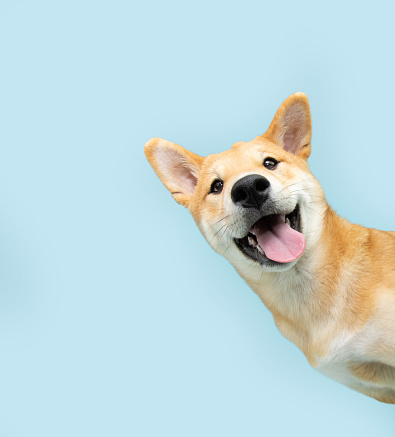

1/1 [==============================] - 0s 44ms/step
[[0.59246564]]
The image represent a Dog


In [ ]:
input_img_path = "/content/dog_pic.jpg"

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)
input_img.shape

input_img_resize = cv2.resize(input_img, (64, 64))
input_img_scaled = input_img_resize / 255
input_img_reshaped = np.reshape(input_img_scaled, [1, 64, 64, 3])

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

if input_prediction > 0:
  print("The image represent a Dog")
else:
  print("The image represent a Cat")